In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
df=pd.read_csv('HMEQ.csv')
display(df.head())
display(df.isnull().sum(axis=0))
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)
df_train,df_test=train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

log_model=Logit.from_formula('BAD~LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC',df_train)
log_result=log_model.fit()
print(log_result.summary())

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

train data size:(2623, 13)
test data size:(1125, 13)
Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.2257
Time:                        11:47:07   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942    

In [12]:
y_pred=log_result.predict(df_test)
y_pred_class=(y_pred>0.5).astype(int)
y_pred_class.head()
print('accuracy:{0:.3f}\n'.format(accuracy_score(df_test['BAD'],y_pred_class)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test['BAD'],y_pred_class)))

accuracy:0.924

confusion matrix:
[[1017    4]
 [  81   23]]


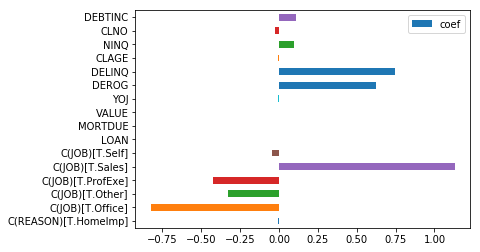

In [13]:
df_logistic_coef=pd.DataFrame({'coef':log_result.params.values[1:]},index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='coef')

In [16]:
df_char=df.select_dtypes(include='object')
df_numeric=df.select_dtypes(exclude='object')
scaler=StandardScaler()
np_numeric_scaled=scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled,columns=df_numeric.columns)
df_scaled=pd.concat([df_numeric_scaled,df_char],axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [17]:
df_scaled['BAD']=np.where(df_scaled['BAD']>0,1,0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [18]:
df_scaled_train,df_scaled_test=train_test_split(df_scaled,test_size=0.3,random_state=1234)

In [19]:
scaled_log_model=Logit.from_formula('BAD~LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC',df_scaled_train)
scaled_log_result=log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.2257
Time:                        12:02:31   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

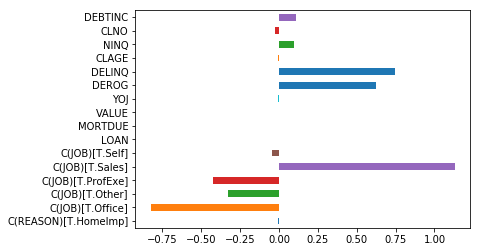

In [23]:
df_log_scaled_coef=pd.DataFrame({'coef':scaled_log_result.params.values[1:]},index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='coef',legend=False)

# 실습

In [40]:
df=pd.read_csv('통신고객이탈.csv',engine='python')
display(df.head())
display(df.isnull().sum(axis=0))

o_cols=df.select_dtypes('object').columns
for col in o_cols:
    _n=len(df[col].value_counts())
    print(col,':',str(_n))
    

df['CHURN']=np.where(df['CHURN']=='Active',0,1)
df.head()


,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [41]:
df_x=df.drop(['CUSTOMER_ID'],axis=1)


In [69]:
df_x.head()
df_x.dtypes

CHURN                   int32
GENDER                 object
AGE                     int64
CHARGE_TYPE            object
HANDSET                object
USAGE_BAND             object
SERVICE_DURATION      float64
DROPPED_CALLS           int64
PEAK_CALLS_NO           int64
PEAK_CALLS_TIME       float64
WEEKEND_CALLS_NO        int64
WEEKEND_CALLS_TIME    float64
TOTAL_CALLS_NO          int64
TOTAL_CALLS_TIME      float64
dtype: object

In [44]:
df_train,df_test=train_test_split(df_x,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

log_model=Logit.from_formula('CHURN~C(GENDER)+AGE+C(CHARGE_TYPE)+C(HANDSET)+C(USAGE_BAND)+SERVICE_DURATION+DROPPED_CALLS+PEAK_CALLS_NO\
+PEAK_CALLS_TIME+WEEKEND_CALLS_NO+WEEKEND_CALLS_TIME+TOTAL_CALLS_NO+TOTAL_CALLS_TIME',df_train)
log_result=log_model.fit()
print(log_result.summary())

train data size:(651, 14)
test data size:(279, 14)
         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.5059
Time:                        14:17:32   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.434     -0.012  

C:\Users\Hanyuri\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:
y_pred=log_result.predict(df_test)
y_pred_class=(y_pred>0.5).astype(int)
y_pred_class.head()
print('accuracy:{0:.3f}\n'.format(accuracy_score(df_test['CHURN'],y_pred_class)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test['CHURN'],y_pred_class)))

accuracy:0.914

confusion matrix:
[[227   8]
 [ 16  28]]


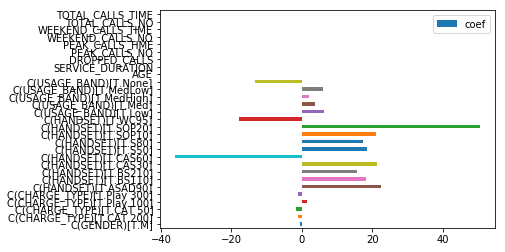

In [47]:
df_logistic_coef=pd.DataFrame({'coef':log_result.params.values[1:]},index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='coef')

In [51]:
df_char=df_x.select_dtypes(include='object')
df_numeric=df_x.select_dtypes(exclude='object')
scaler=StandardScaler()
np_numeric_scaled=scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled,columns=df_numeric.columns)
df_scaled=pd.concat([df_numeric_scaled,df_char],axis=1)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,F,CAT 100,ASAD170,Med
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,M,CAT 100,S50,Med
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,M,CAT 100,ASAD170,Med
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,M,CAT 100,ASAD170,Med
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,F,CAT 100,S50,Med


In [70]:
# float->int  y는 int여야함
df_scaled['CHURN']=np.where(df_scaled['CHURN']>0,int(1),int(0))
df_scaled.head()



,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,F,CAT 100,S50,Med


In [71]:
df_scaled.dtypes

CHURN                   int32
AGE                   float64
SERVICE_DURATION      float64
DROPPED_CALLS         float64
PEAK_CALLS_NO         float64
PEAK_CALLS_TIME       float64
WEEKEND_CALLS_NO      float64
WEEKEND_CALLS_TIME    float64
TOTAL_CALLS_NO        float64
TOTAL_CALLS_TIME      float64
GENDER                 object
CHARGE_TYPE            object
HANDSET                object
USAGE_BAND             object
dtype: object

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.5059
Time:                        14:56:54   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -22.6857   2065.398     -0.011      0.991   -4070.791    4025.420
C(GENDER)[T.M]   

C:\Users\Hanyuri\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


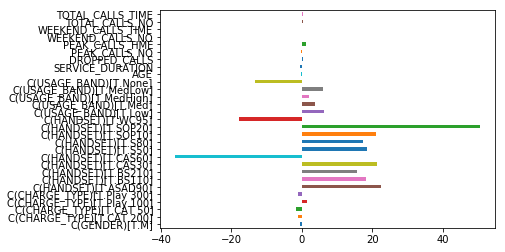

In [72]:
df_scaled_train, df_scaled_test=train_test_split(df_scaled,test_size=0.3,random_state=1234)

scaled_log_model=Logit.from_formula('CHURN ~ C(GENDER)+AGE+C(CHARGE_TYPE)+C(HANDSET)+C(USAGE_BAND)+SERVICE_DURATION+\
DROPPED_CALLS+PEAK_CALLS_NO+PEAK_CALLS_TIME+WEEKEND_CALLS_NO+WEEKEND_CALLS_TIME+TOTAL_CALLS_NO+TOTAL_CALLS_TIME',df_scaled_train)
scaled_log_result=scaled_log_model.fit()
print(scaled_log_result.summary())

df_log_scaled_coef=pd.DataFrame({'coef':scaled_log_result.params.values[1:]},index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='coef',legend=False)

In [76]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
matplotlib.rc('font',family='Malgun Gothic')

In [77]:
df=pd.read_csv('HMEQ.csv')
display(df.isnull().sum(axis=0))
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)
df_dummy=pd.get_dummies(df)
df_dummy.head()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [83]:
df_y=df_dummy['BAD']
df_x=df_dummy.drop(['BAD'],axis=1)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train_x.shape))
print('train data size:{}'.format(df_train_y.shape))
print('test data size:{}'.format(df_test_x.shape))
print('test data size:{}'.format(df_test_y.shape))

train data size:(2623, 18)
train data size:(2623,)
test data size:(1125, 18)
test data size:(1125,)


In [85]:
tree_un=DecisionTreeClassifier(random_state=1234)
tree_un.fit(df_train_x,df_train_y)
print('accuracy on training set:{0:.3f}\n'.format(tree_un.score(df_train_x,df_train_y)))
print('accuracy on test set:{0:.3f}\n'.format(tree_un.score(df_test_x,df_test_y)))

accuracy on training set:1.000

accuracy on test set:0.932



In [88]:
train_accuracy=[];test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['Trainaccuracy']=train_accuracy
df_accuracy_depth['Testaccuracy']=test_accuracy
df_accuracy_depth.round(3)

,depth,Trainaccuracy,Testaccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


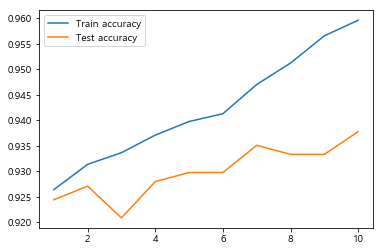

In [90]:
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='-',label='Test accuracy')
plt.legend()

#depth=4

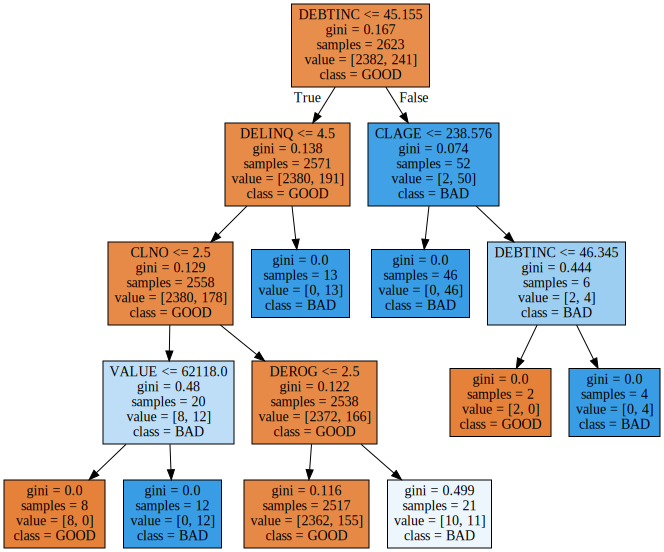

In [91]:
v_feature_names=df_train_x.columns
tree_depth4=DecisionTreeClassifier(max_depth=4,random_state=1234)
tree_depth4.fit(df_train_x,df_train_y)
export_graphviz(tree_depth4,out_file='tree_depth4.dot',class_names=['GOOD','BAD'],\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth4.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

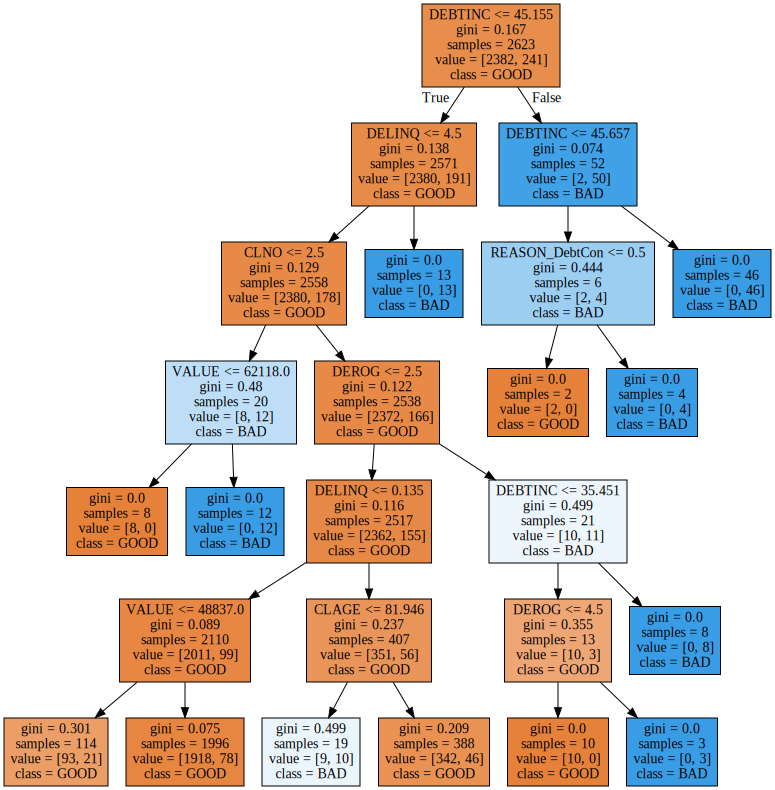

In [92]:
#depth=6
v_feature_names=df_train_x.columns
tree_depth6=DecisionTreeClassifier(max_depth=6,random_state=1234)
tree_depth6.fit(df_train_x,df_train_y)
export_graphviz(tree_depth6,out_file='tree_depth6.dot',class_names=['GOOD','BAD'],\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth6.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

,MinSamplessplit,Trainaccuracy,Testaccuracy
0,2,0.937,0.928
1,3,0.937,0.928
2,4,0.937,0.928
3,5,0.937,0.928
4,6,0.937,0.928
5,7,0.936,0.928
6,8,0.936,0.928
7,9,0.936,0.928
8,10,0.936,0.928


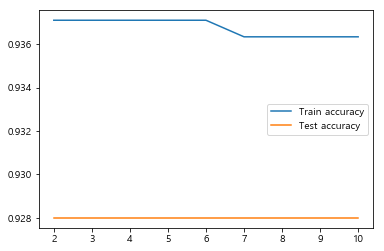

In [95]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split for n_split in range(2,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,max_depth=4,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplessplit']=para_split
df_accuracy_split['Trainaccuracy']=train_accuracy
df_accuracy_split['Testaccuracy']=test_accuracy
display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='-',label='Test accuracy')
plt.legend()

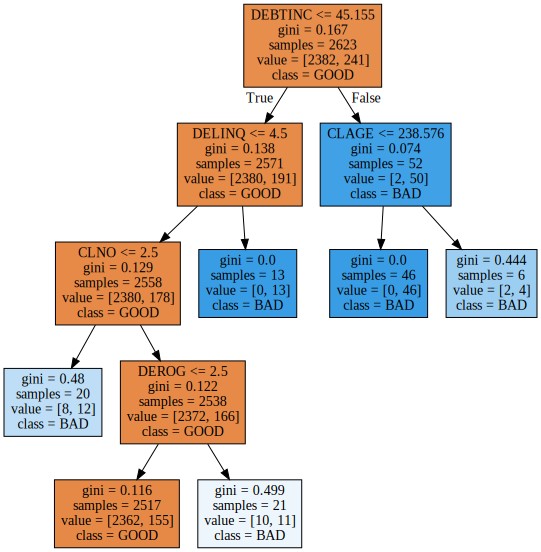

In [97]:
# split=50
v_feature_names=df_train_x.columns
tree_split50=DecisionTreeClassifier(max_depth=4,min_samples_split=50,random_state=1234)
tree_split50.fit(df_train_x,df_train_y)
export_graphviz(tree_split50,out_file='tree_split50.dot',class_names=['GOOD','BAD'],\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_split50.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

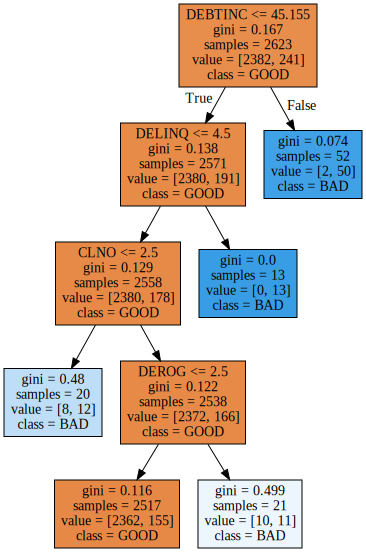

In [98]:
# split=100
v_feature_names=df_train_x.columns
tree_split100=DecisionTreeClassifier(max_depth=4,min_samples_split=100,random_state=1234)
tree_split100.fit(df_train_x,df_train_y)
export_graphviz(tree_split100,out_file='tree_split100.dot',class_names=['GOOD','BAD'],\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_split100.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.936,0.928
1,20,0.932,0.919
2,30,0.930,0.925
3,40,0.926,0.924
4,50,0.926,0.924
5,60,0.925,0.926
6,70,0.925,0.925
7,80,0.924,0.924
8,90,0.921,0.921
9,100,0.918,0.918


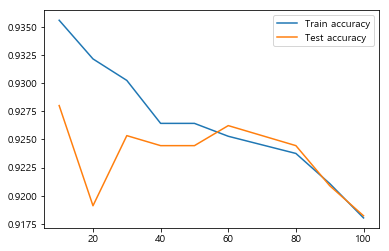

In [100]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,\
                               max_depth=4)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['Trainaccuracy']=train_accuracy
df_score_leaf['Testaccuracy']=test_accuracy
display(df_score_leaf.round(3))   
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='-',label='Test accuracy')
plt.legend()

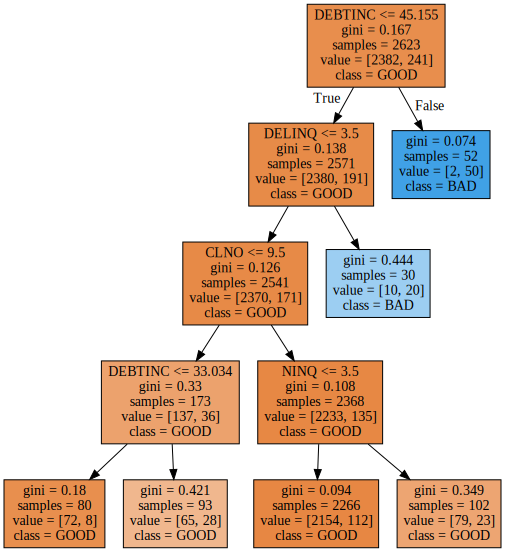

In [101]:
# leaf=30
v_feature_names=df_train_x.columns
tree_leaf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=30,\
                                    random_state=1234)
tree_leaf.fit(df_train_x,df_train_y)
export_graphviz(tree_leaf,out_file='tree_leaf.dot',class_names=['GOOD','BAD'],\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))



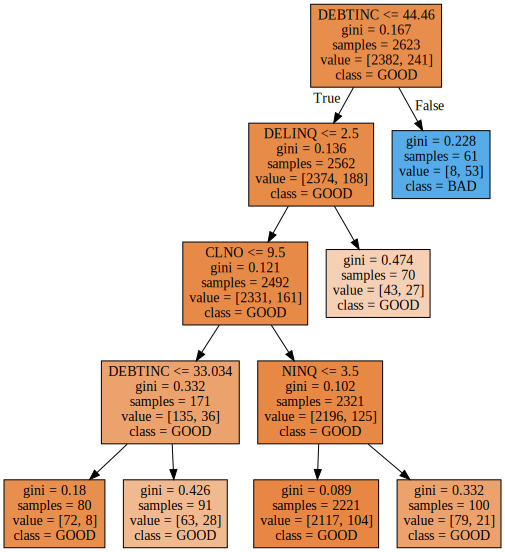

In [102]:
# leaf=60
v_feature_names=df_train_x.columns
tree_leaf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=60,\
                                    random_state=1234)
tree_leaf.fit(df_train_x,df_train_y)
export_graphviz(tree_leaf,out_file='tree_leaf.dot',class_names=['GOOD','BAD'],\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))



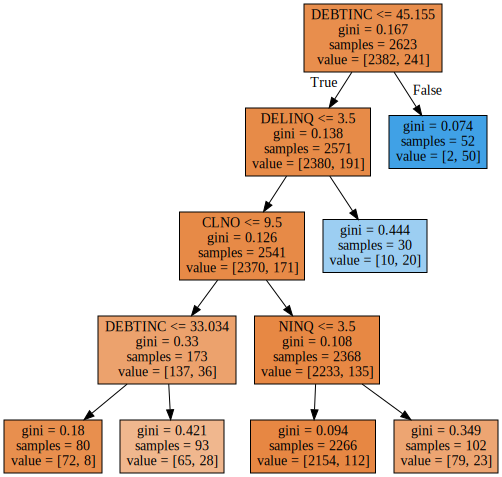

In [106]:
tree_final=DecisionTreeClassifier(min_samples_leaf=30,max_depth=4)       
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final,out_file='tree_final.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [110]:
y_pred=tree_final.predict(df_test_x)

print('accuracy:{0:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

accuracy:0.925

confusion matrix:
[[1017    4]
 [  80   24]]


,feature,importance
9,DEBTINC,0.707
5,DELINQ,0.180
8,CLNO,0.062
7,NINQ,0.051
11,REASON_HomeImp,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000
13,JOB_Office,0.000
12,JOB_Mgr,0.000


Text(0,0.5,'변수')

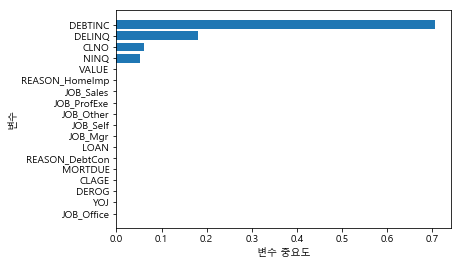

In [112]:
df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))

df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))

plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [114]:
estimator=DecisionTreeClassifier()
param_grid={'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}
grid_dt=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('best score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter:
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score:
0.929
